In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns

In [3]:
Bites_df = pd.read_csv("Health_AnimalBites.csv")

In [4]:
Bites_df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

bite_date: The date the bite occurred

SpeciesIDDesc: The species of animal that did the biting

BreedIDDesc: Breed (if known)

GenderIDDesc: Gender (of the animal)

color: color of the animal

vaccination_yrs: how many years had passed since the last vaccination

vaccination_date: the date of the last vaccination

victim_zip: the zipcode of the victim

AdvIssuedYNDesc: whether advice was issued

WhereBittenIDDesc: Where on the body the victim was bitten

quarantine_date: whether the animal was quarantined

DispositionIDDesc: whether the animal was released from quarantine

head_sent_date: the date the animal’s head was sent to the lab

release_date: the date the animal was released

ResultsIDDesc: results from lab tests (for rabies)

In [6]:
Bites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


<Axes: >

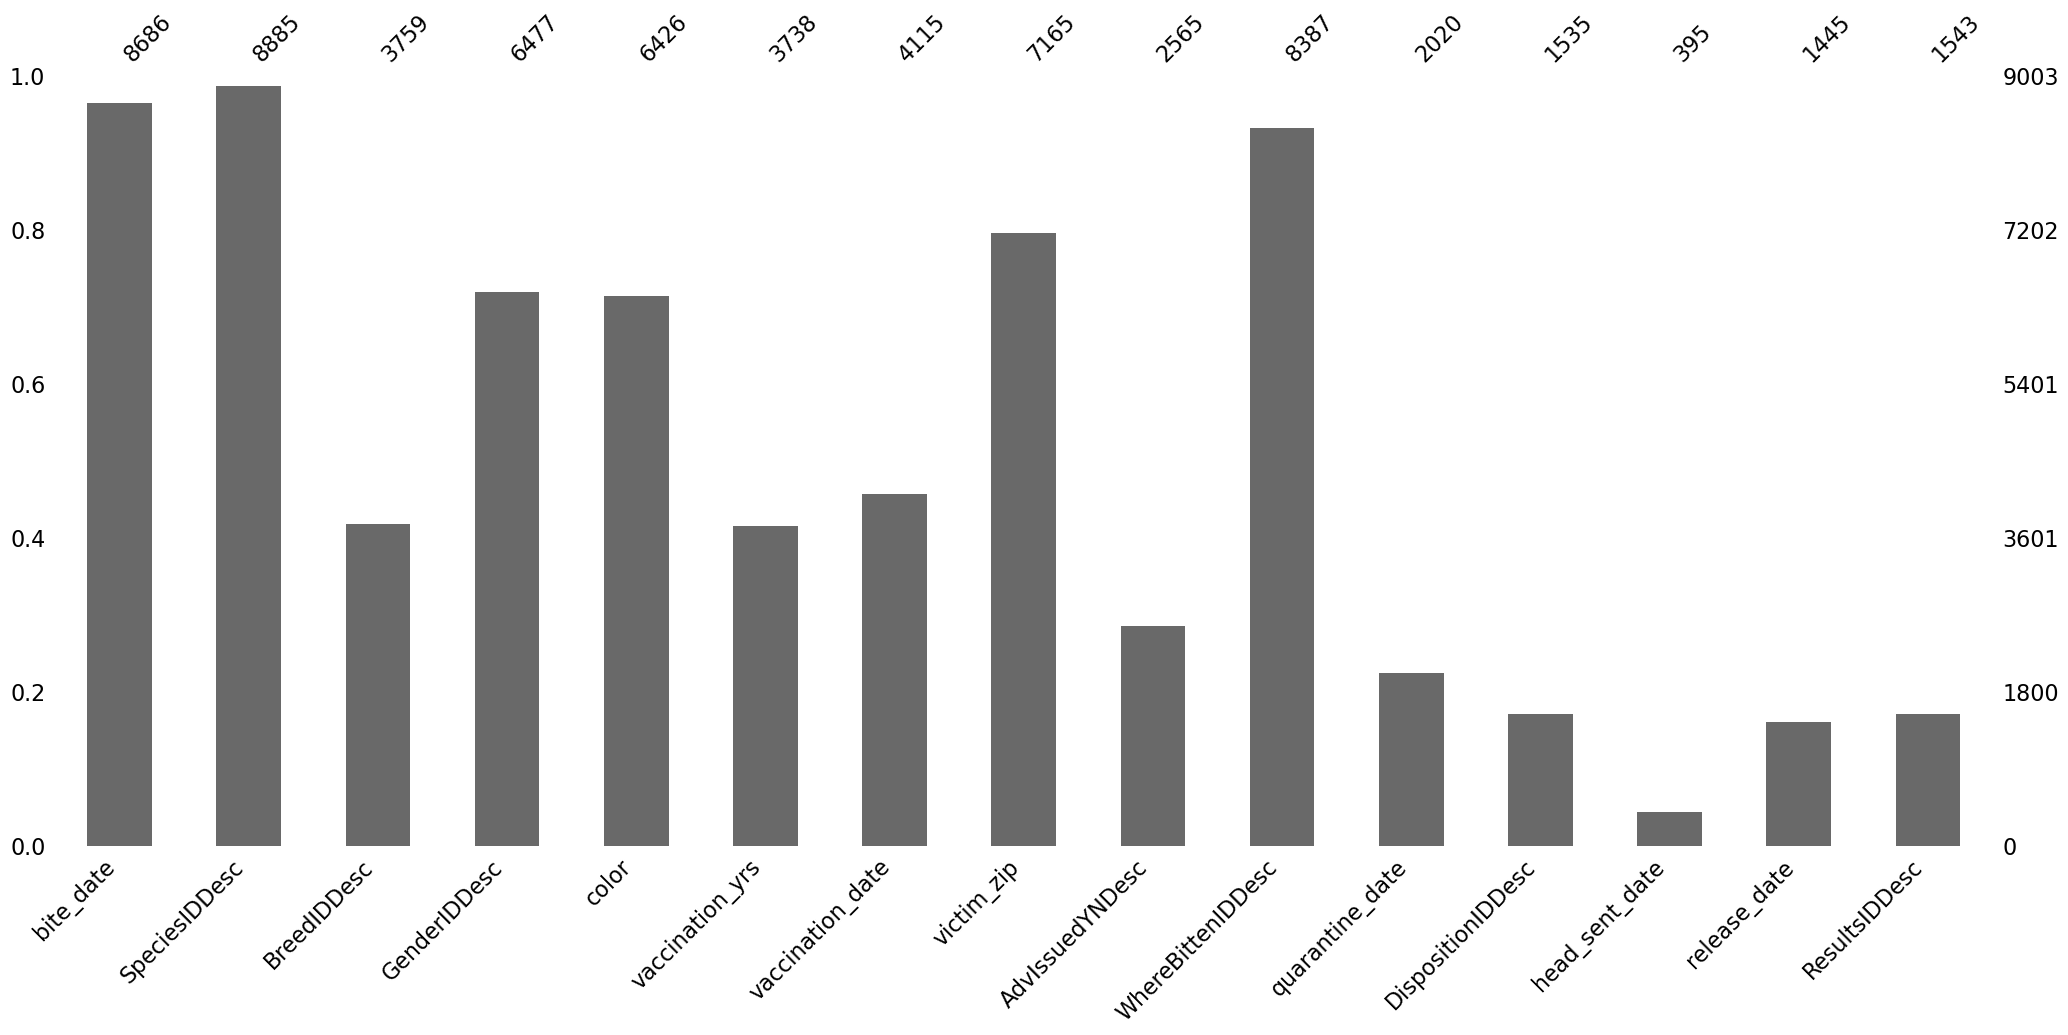

In [7]:
msno.bar(Bites_df)

<Axes: >

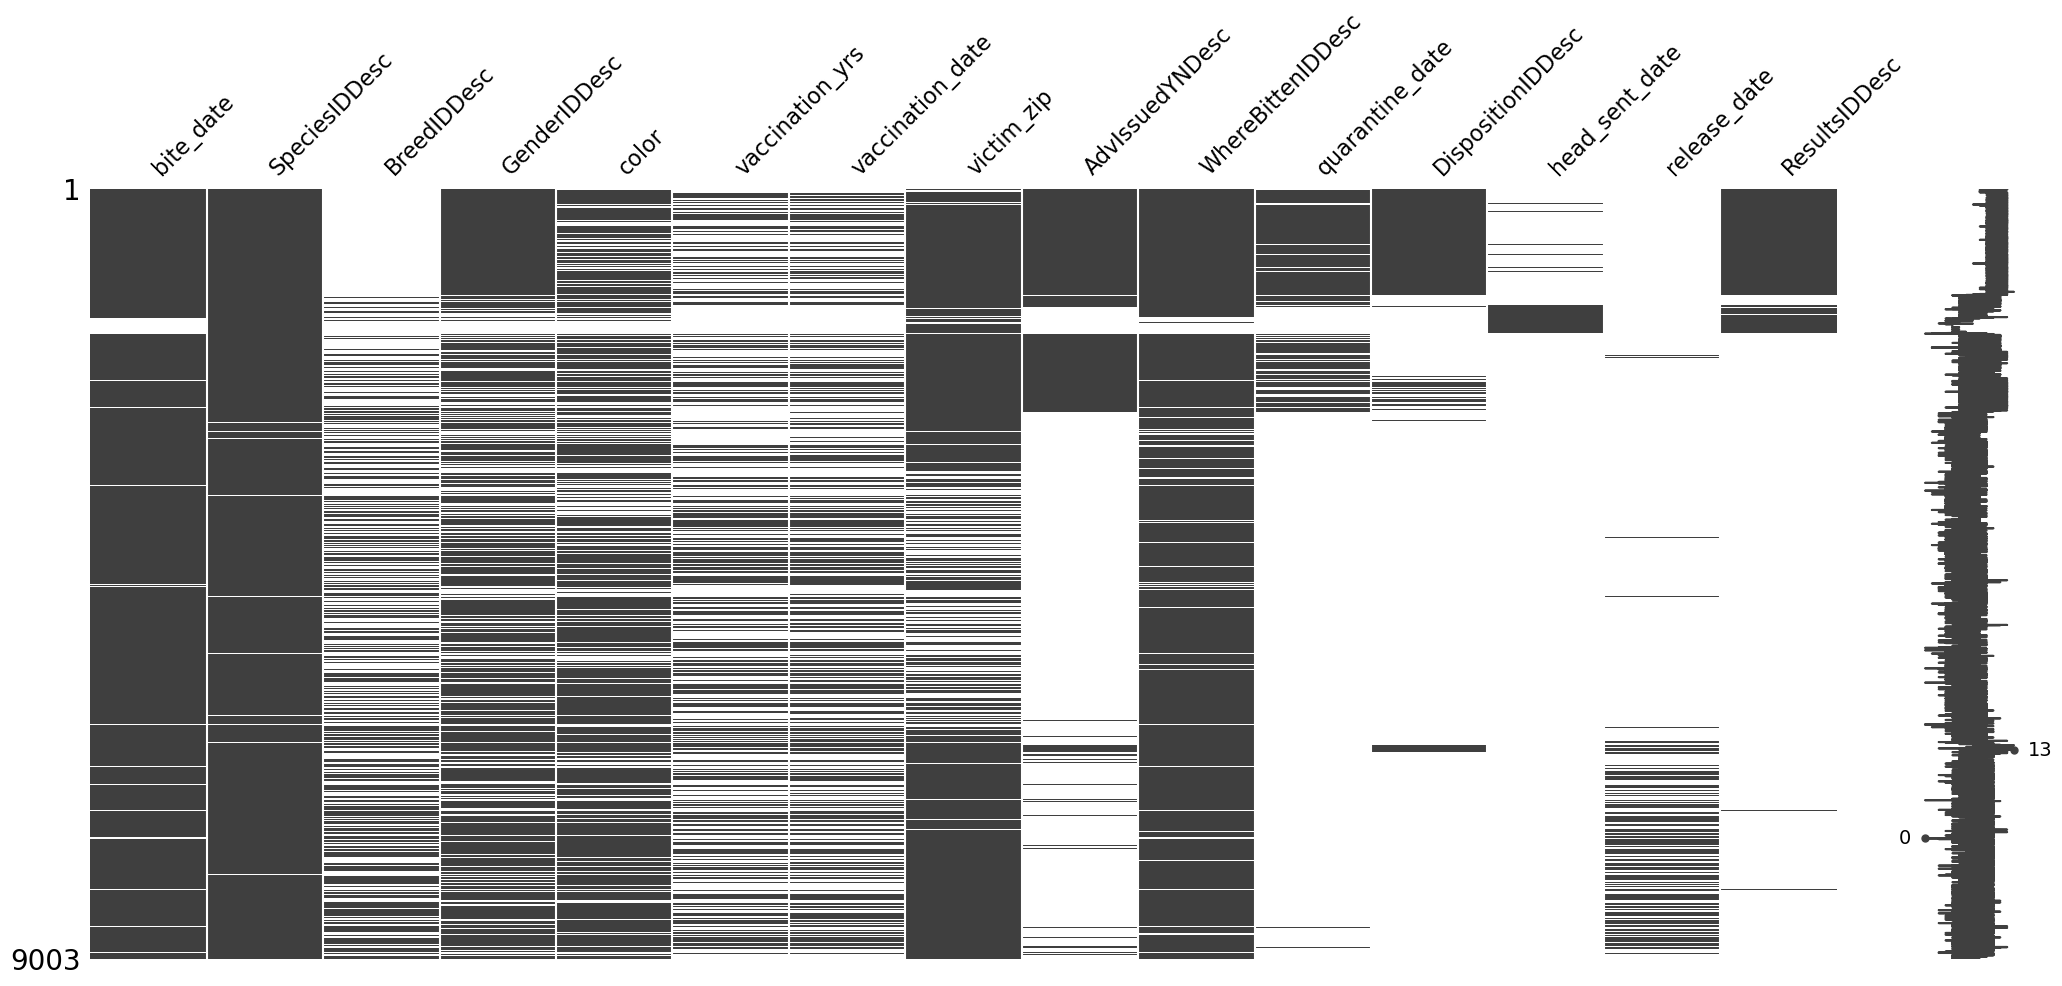

In [8]:
msno.matrix(Bites_df)

<Axes: >

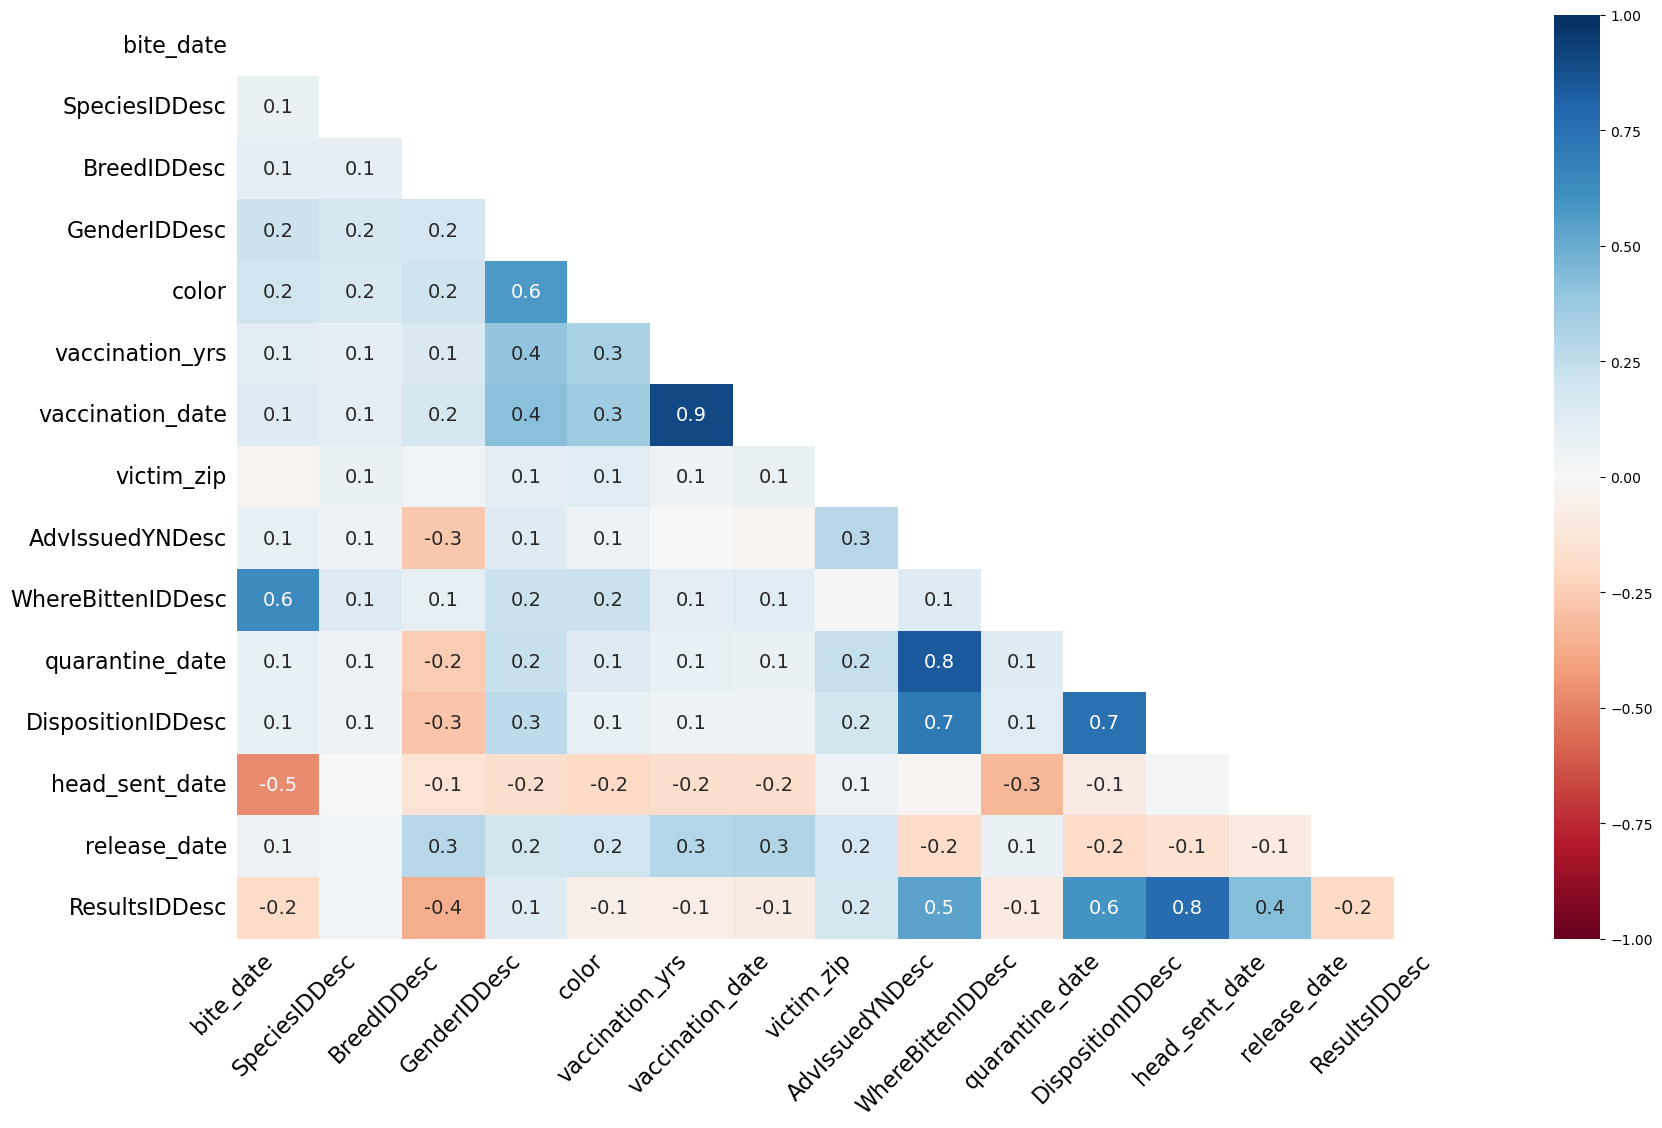

In [9]:
msno.heatmap(Bites_df)

<Axes: >

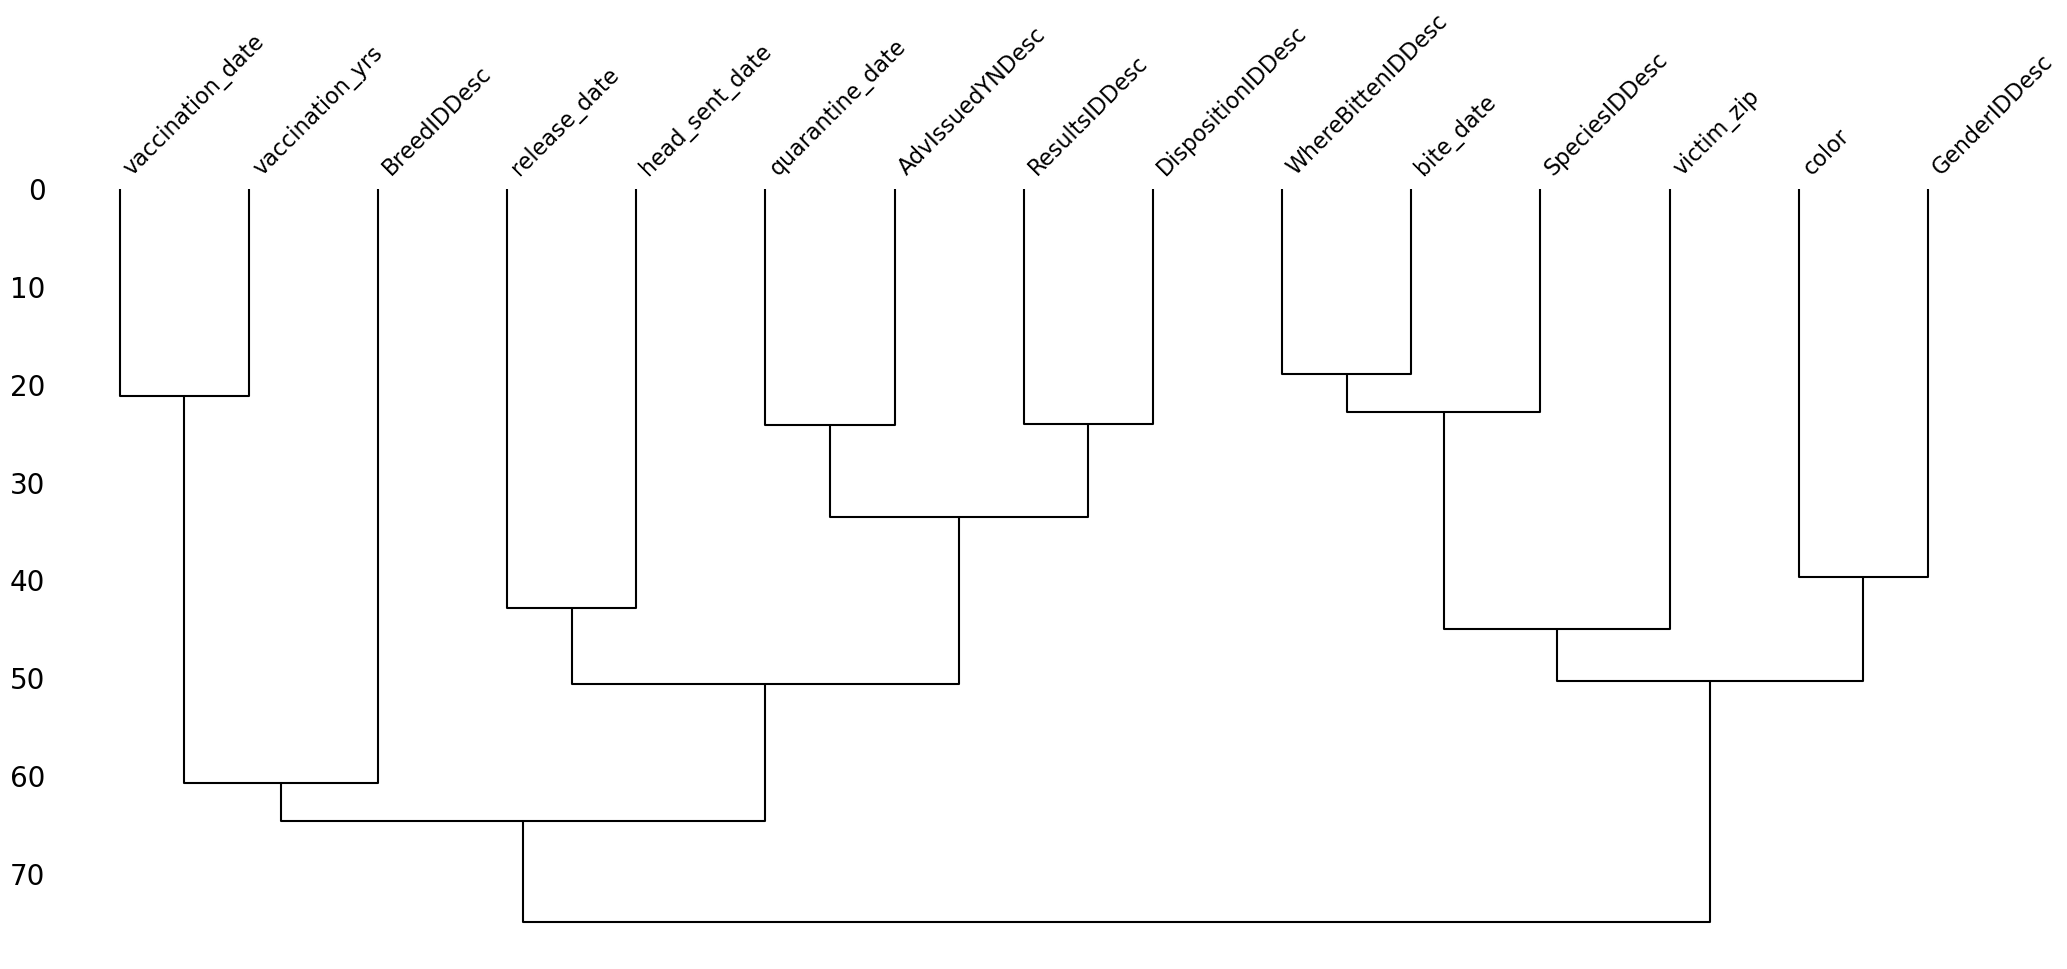

In [10]:
msno.dendrogram(Bites_df)

In [11]:
Bites_df['bite_date'] = pd.to_datetime(Bites_df['bite_date'], errors='coerce')
Bites_df['vaccination_date'] = pd.to_datetime(Bites_df['vaccination_date'], errors='coerce')
Bites_df['quarantine_date'] = pd.to_datetime(Bites_df['quarantine_date'], errors='coerce')
Bites_df['head_sent_date'] = pd.to_datetime(Bites_df['head_sent_date'], errors='coerce')
Bites_df['release_date'] = pd.to_datetime(Bites_df['release_date'], errors='coerce')

In [12]:
Bites_df.describe()

,bite_date,vaccination_yrs,vaccination_date,quarantine_date,head_sent_date,release_date
count,8685,3738.000000,4115,2020,395,1445
mean,2013-09-28 03:33:43.212435200,1.452113,2013-05-17 03:39:03.718104320,2010-09-08 11:55:00.594059264,2014-11-25 22:47:05.316455680,2016-04-17 12:31:23.460207616
min,1952-05-28 00:00:00,1.000000,1985-06-20 00:00:00,1985-05-05 00:00:00,2010-01-10 00:00:00,2011-05-09 00:00:00
25%,2011-11-01 00:00:00,1.000000,2011-07-05 12:00:00,2010-06-09 00:00:00,2012-08-25 12:00:00,2015-11-03 00:00:00
50%,2013-09-07 00:00:00,1.000000,2013-06-05 00:00:00,2010-11-13 12:00:00,2015-09-08 00:00:00,2016-06-13 00:00:00
75%,2015-08-16 00:00:00,1.000000,2015-04-02 00:00:00,2011-06-16 00:00:00,2016-09-12 12:00:00,2017-02-22 00:00:00
max,2201-05-01 00:00:00,11.000000,2018-07-21 00:00:00,2017-09-01 00:00:00,2017-09-05 00:00:00,2019-05-19 00:00:00
std,NaN,0.848416,NaN,NaN,NaN,NaN


In [13]:
start_date = pd.Timestamp('1985-01-01')
end_date = pd.Timestamp('2017-12-31')

Bites_df.loc[(Bites_df['bite_date'] < start_date) | (Bites_df['bite_date'] > end_date), 'bite_date'] = np.nan
Bites_df.loc[(Bites_df['vaccination_date'] > end_date), 'vaccination_date'] = np.nan
Bites_df.loc[(Bites_df['release_date'] > end_date), 'release_date'] = np.nan

In [14]:
Bites_df = Bites_df.sort_values(by='bite_date').reset_index(drop=True)

In [15]:
Bites_df.describe()

,bite_date,vaccination_yrs,vaccination_date,quarantine_date,head_sent_date,release_date
count,8676,3738.000000,4112,2020,395,1444
mean,2013-09-05 03:43:44.066390016,1.452113,2013-05-15 20:14:28.482490368,2010-09-08 11:55:00.594059264,2014-11-25 22:47:05.316455680,2016-04-16 17:48:01.994459904
min,1985-05-05 00:00:00,1.000000,1985-06-20 00:00:00,1985-05-05 00:00:00,2010-01-10 00:00:00,2011-05-09 00:00:00
25%,2011-11-01 00:00:00,1.000000,2011-07-04 06:00:00,2010-06-09 00:00:00,2012-08-25 12:00:00,2015-11-03 00:00:00
50%,2013-09-05 12:00:00,1.000000,2013-06-04 12:00:00,2010-11-13 12:00:00,2015-09-08 00:00:00,2016-06-13 00:00:00
75%,2015-08-15 00:00:00,1.000000,2015-04-02 00:00:00,2011-06-16 00:00:00,2016-09-12 12:00:00,2017-02-21 06:00:00
max,2017-09-07 00:00:00,11.000000,2017-12-26 00:00:00,2017-09-01 00:00:00,2017-09-05 00:00:00,2017-09-06 00:00:00
std,NaN,0.848416,NaN,NaN,NaN,NaN


In [16]:
Bites_df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20,40229,NO,BODY,1985-05-05,UNKNOWN,NaT,NaT,UNKNOWN
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaT,40218,NO,BODY,1986-02-12,UNKNOWN,NaT,NaT,UNKNOWN
2,1987-05-07,DOG,NaN,UNKNOWN,NaN,NaN,NaT,40219,NO,BODY,1990-05-07,UNKNOWN,NaT,NaT,UNKNOWN
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaT,NaN,NO,BODY,1990-10-02,UNKNOWN,NaT,NaT,UNKNOWN
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaT,NaN,NO,BODY,NaT,UNKNOWN,NaT,NaT,UNKNOWN


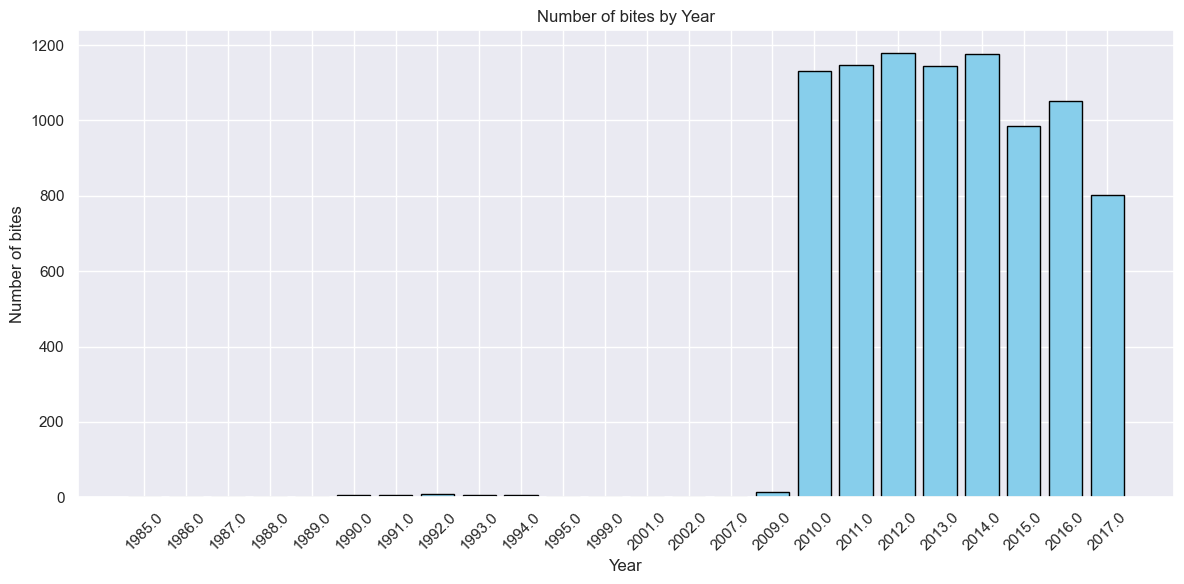

In [18]:
sns.set()
Bites_df['year'] = Bites_df['bite_date'].dt.year
# Group by year and count occurrences
year_counts = Bites_df.groupby('year').size()

# Plot bar graph for number of entries by year
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index.astype(str), year_counts.values, color='skyblue', edgecolor='black')

# Customize tick labels
plt.title('Number of bites by Year')
plt.xlabel('Year')
plt.ylabel('Number of bites')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.tight_layout()
plt.show()

https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/15/tavg/1/0/2010-2017?base_prd=true&begbaseyear=1985&endbaseyear=2017

In [157]:
temp_df = pd.read_csv("temperature.csv")
temp_df.dtypes

Date            object
Temperature    float64
dtype: object

In [159]:
temp_df

,Date,Temperature
0,1/15/2010,29.8
1,2/15/2024,30.6
2,3/15/2024,46.5
3,4/15/2024,59.9
4,5/15/2024,67.3
...,...,...
91,8/15/2024,73.1
92,9/15/2024,68.3
93,10/15/2024,59.4
94,11/15/2024,47.1


In [161]:
temp_df['Date'] = pd.to_datetime(temp_df['Date'], errors='coerce')
temp_df

,Date,Temperature
0,2010-01-15,29.8
1,2024-02-15,30.6
2,2024-03-15,46.5
3,2024-04-15,59.9
4,2024-05-15,67.3
...,...,...
91,2024-08-15,73.1
92,2024-09-15,68.3
93,2024-10-15,59.4
94,2024-11-15,47.1


In [19]:
# Extract month while handling NaT (Not a Time) values
Bites_df['month'] = Bites_df['bite_date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
Bites_df['month'] = pd.Categorical(Bites_df['month'], categories=month_order, ordered=True)

# Group by day_of_week and count occurrences
month_counts = Bites_df['month'].value_counts().reindex(month_order)

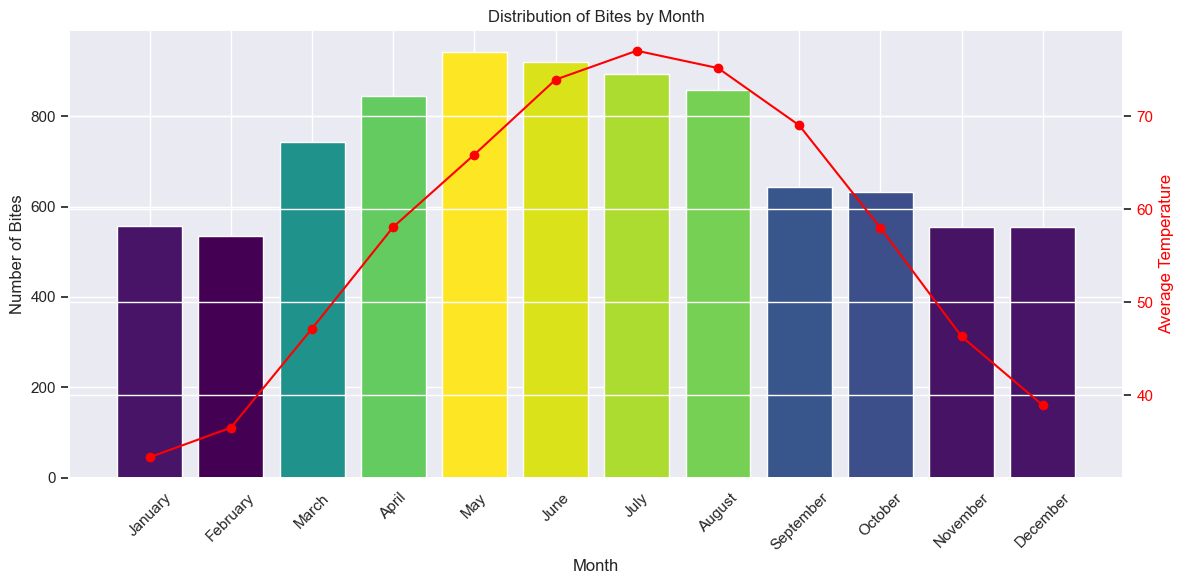

In [173]:

# Normalize the values to map them to a color scale
norm = plt.Normalize(min(month_counts.values), max(month_counts.values))

cmap = plt.get_cmap('viridis')

# Get colors based on the normalized values
colors = cmap(norm(month_counts.values))

# Create the plot and specify the axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar graph with colored bars on the primary y-axis
bars = ax1.bar(month_counts.index, month_counts.values, color=colors)

# Customize the primary y-axis
ax1.set_title('Distribution of Bites by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Bites')
ax1.set_xticks(month_counts.index)
ax1.set_xticklabels(month_counts.index, rotation=45)

# Create a secondary y-axis and plot temperature data
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis

# Plot the temperature data
ax2.plot(average_temperature.index, average_temperature.values, marker='o', linestyle='-', color='red')

# Customize the secondary y-axis
ax2.set_ylabel('Average Temperature', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()


In [21]:
# Extract month while handling NaT (Not a Time) values
Bites_df['day_of_week'] = Bites_df['bite_date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Bites_df['day_of_week'] = pd.Categorical(Bites_df['day_of_week'], categories=days_order, ordered=True)

# Group by day_of_week and count occurrences
day_counts = Bites_df['day_of_week'].value_counts().reindex(days_order)

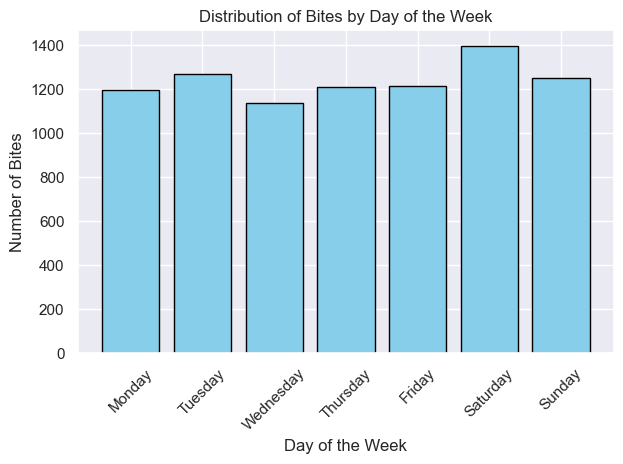

In [22]:
# Plot bar graph for number of entries by month
plt.bar(day_counts.index, day_counts.values, color='skyblue', edgecolor='black')

# Customize tick labels
plt.title('Distribution of Bites by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [23]:
Bites_df.SpeciesIDDesc.unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', nan, 'HORSE', 'RABBIT',
       'SKUNK', 'FERRET'], dtype=object)

In [24]:
pd.DataFrame(Bites_df.SpeciesIDDesc.value_counts()).reset_index()

,SpeciesIDDesc,count
0,DOG,7029
1,CAT,1568
2,BAT,237
3,RACCOON,27
4,OTHER,11
5,HORSE,5
6,FERRET,4
7,RABBIT,3
8,SKUNK,1


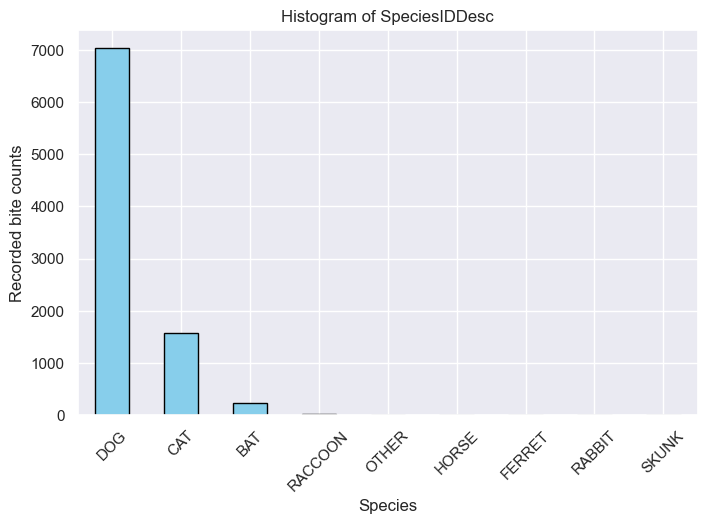

In [25]:
plt.figure(figsize=(8, 5))
Bites_df['SpeciesIDDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of SpeciesIDDesc')
plt.xlabel('Species')
plt.ylabel('Recorded bite counts')
plt.xticks(rotation=45)
plt.show()

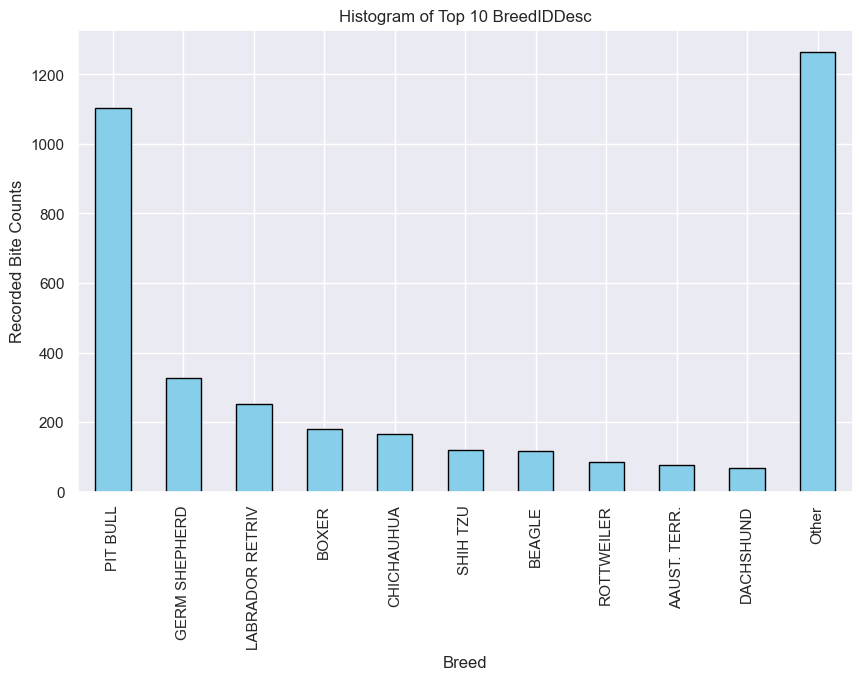

In [108]:
plt.figure(figsize=(10, 6))

# Get the value counts and identify the top 10 breeds
breed_counts = Bites_df['BreedIDDesc'].value_counts()
top_10_breeds = breed_counts[:10]
other_count = breed_counts[10:].sum()

# Add the "Other" category to the top 10
top_10_breeds['Other'] = other_count

# Plot the histogram
top_10_breeds.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Top 10 BreedIDDesc')
plt.xlabel('Breed')
plt.ylabel('Recorded Bite Counts')
plt.xticks(rotation=90)
plt.show()


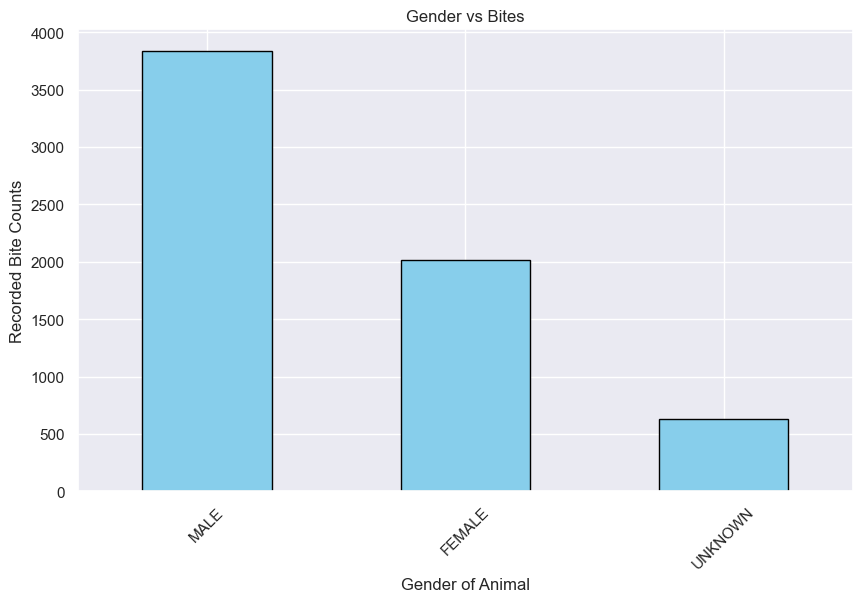

In [27]:
plt.figure(figsize=(10, 6))
# Plot the histogram
Bites_df['GenderIDDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender vs Bites')
plt.xlabel('Gender of Animal')
plt.ylabel('Recorded Bite Counts')
plt.xticks(rotation=45)
plt.show()


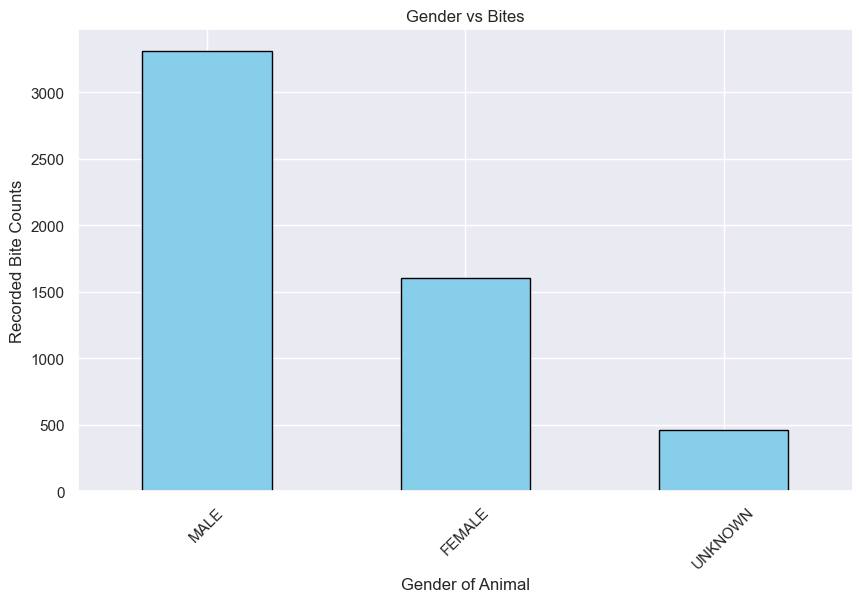

In [28]:
plt.figure(figsize=(10, 6))
# Plot the histogram
Bites_df[Bites_df['SpeciesIDDesc']=="DOG"]['GenderIDDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender vs Bites')
plt.xlabel('Gender of Animal')
plt.ylabel('Recorded Bite Counts')
plt.xticks(rotation=45)
plt.show()

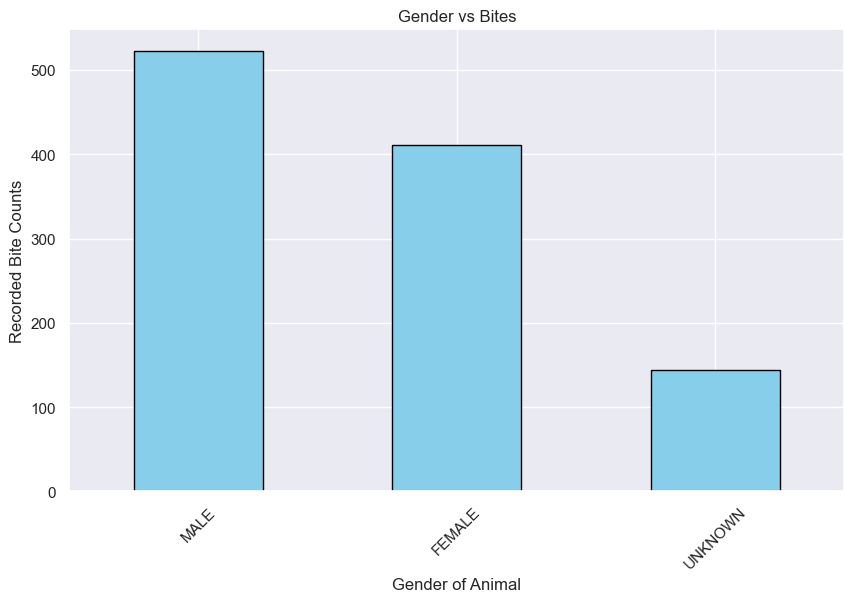

In [29]:
plt.figure(figsize=(10, 6))
# Plot the histogram
Bites_df[Bites_df['SpeciesIDDesc']=="CAT"]['GenderIDDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender vs Bites')
plt.xlabel('Gender of Animal')
plt.ylabel('Recorded Bite Counts')
plt.xticks(rotation=45)
plt.show()

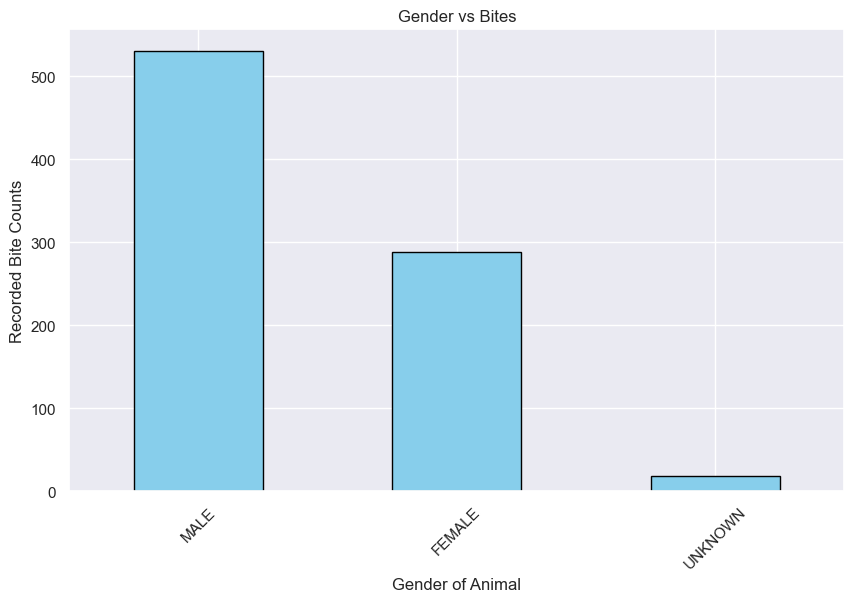

In [30]:
plt.figure(figsize=(10, 6))
# Plot the histogram
Bites_df[Bites_df['BreedIDDesc']=="PIT BULL"]['GenderIDDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender vs Bites')
plt.xlabel('Gender of Animal')
plt.ylabel('Recorded Bite Counts')
plt.xticks(rotation=45)
plt.show()

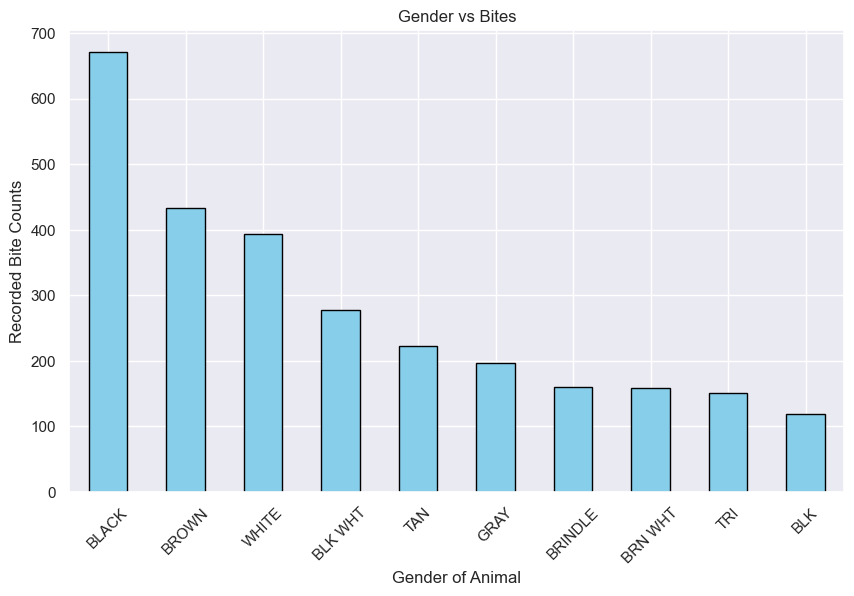

In [31]:
plt.figure(figsize=(10, 6))
# Plot the histogram
Bites_df['color'].value_counts()[:10].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender vs Bites')
plt.xlabel('Gender of Animal')
plt.ylabel('Recorded Bite Counts')
plt.xticks(rotation=45)
plt.show()

In [33]:
Bites_df['vaccination_yrs'].unique()

array([ 1., nan,  3.,  2., 11.])

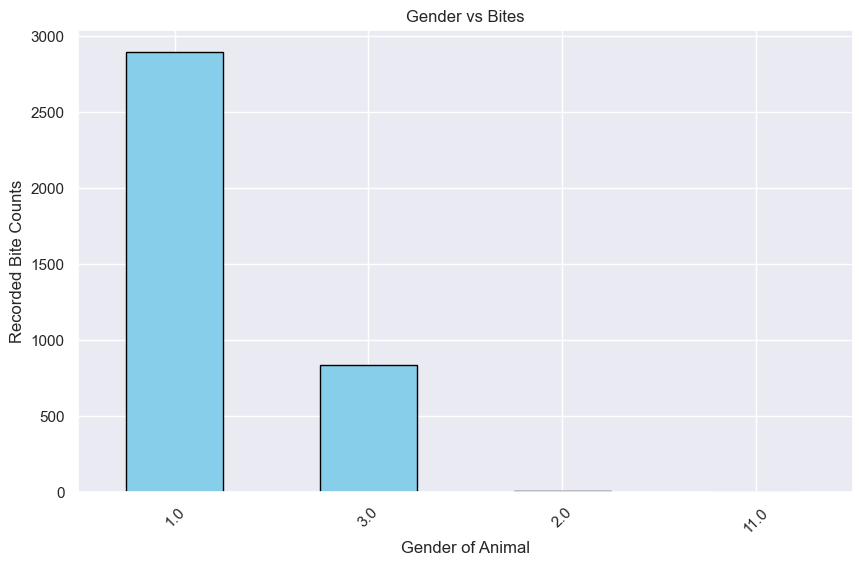

In [34]:
plt.figure(figsize=(10, 6))
# Plot the histogram
Bites_df['vaccination_yrs'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender vs Bites')
plt.xlabel('Gender of Animal')
plt.ylabel('Recorded Bite Counts')
plt.xticks(rotation=45)
plt.show()

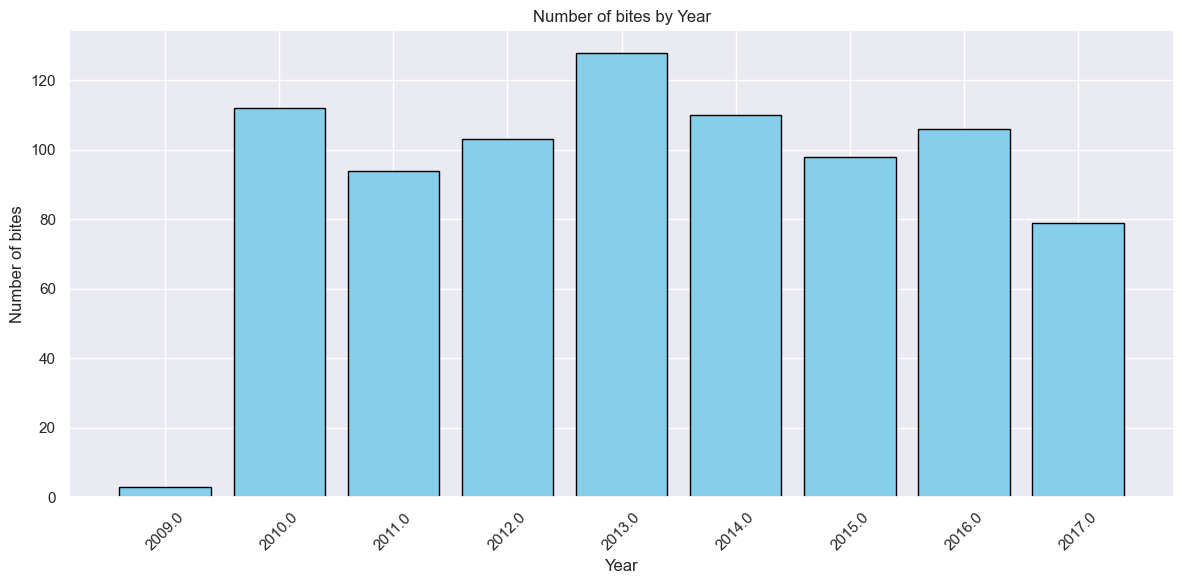

In [35]:
# Group by year and count occurrences
year_counts = Bites_df[Bites_df['vaccination_yrs']>1.0].groupby('year').size()

# Plot bar graph for number of entries by year
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index.astype(str), year_counts.values, color='skyblue', edgecolor='black')

# Customize tick labels
plt.title('Number of bites by Year')
plt.xlabel('Year')
plt.ylabel('Number of bites')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.tight_layout()
plt.show()

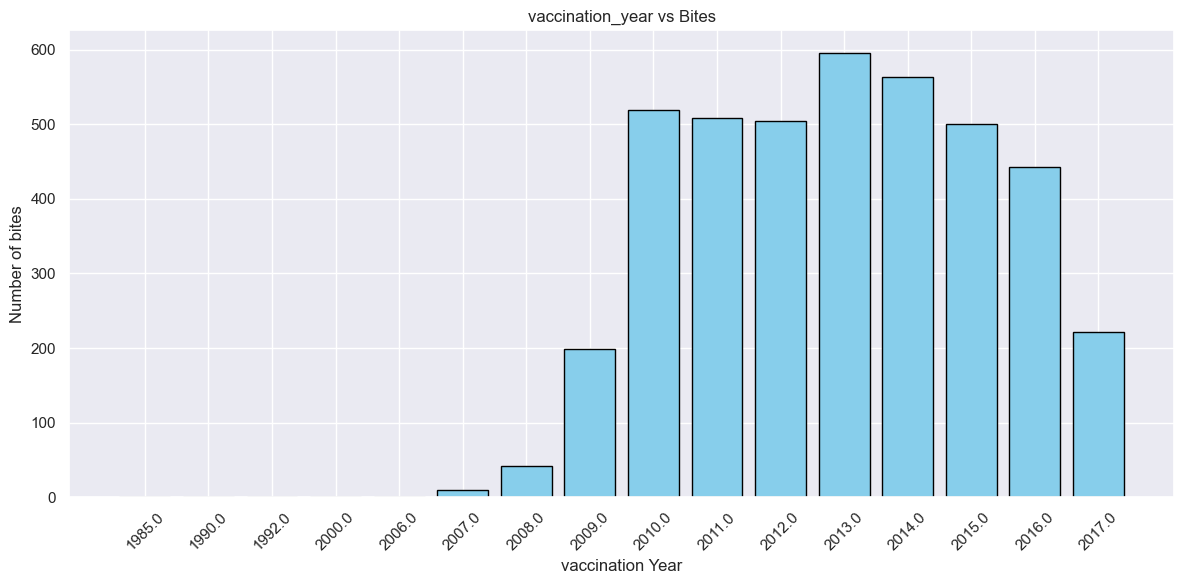

In [82]:
Bites_df['vaccination_year'] = Bites_df['vaccination_date'].dt.year
# Group by year and count occurrences
vaccination_year_counts = Bites_df.groupby('vaccination_year').size()

# Plot bar graph for number of entries by year
plt.figure(figsize=(12, 6))
plt.bar(vaccination_year_counts.index.astype(str), vaccination_year_counts.values, color='skyblue', edgecolor='black')

# Customize tick labels
plt.title('vaccination_year vs Bites')
plt.xlabel('vaccination Year')
plt.ylabel('Number of bites')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.tight_layout()
plt.show()

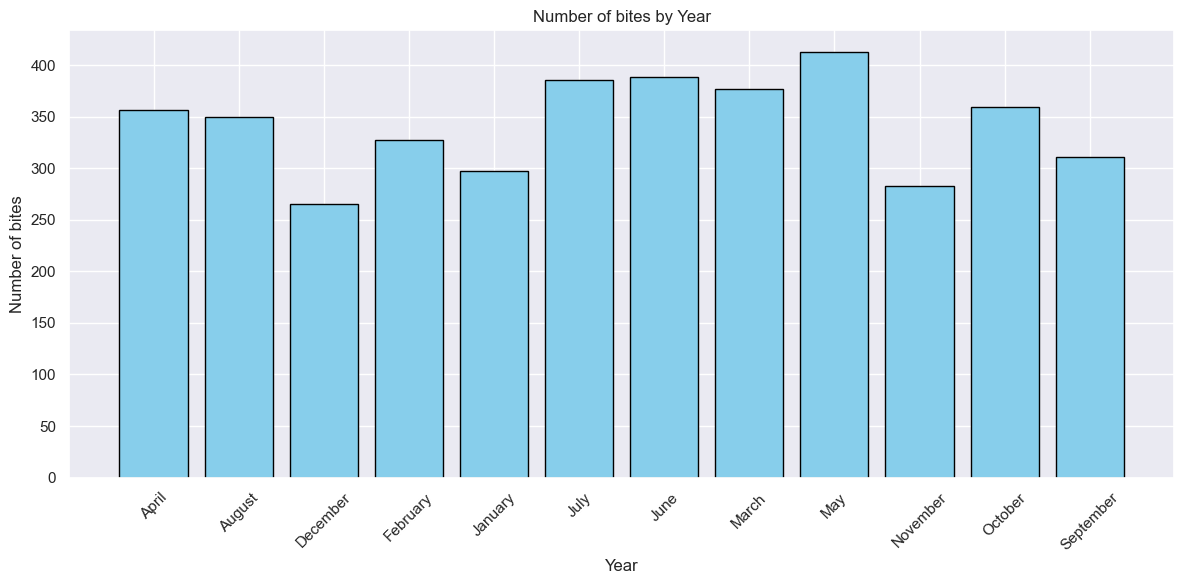

In [84]:
Bites_df['vaccination_month'] = Bites_df['vaccination_date'].dt.month_name()
# Group by year and count occurrences
vaccination_month_counts = Bites_df.groupby('vaccination_month').size()

# Plot bar graph for number of entries by year
plt.figure(figsize=(12, 6))
plt.bar(vaccination_month_counts.index.astype(str), vaccination_month_counts.values, color='skyblue', edgecolor='black')

# Customize tick labels
plt.title('Number of bites by Year')
plt.xlabel('Year')
plt.ylabel('Number of bites')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.tight_layout()
plt.show()

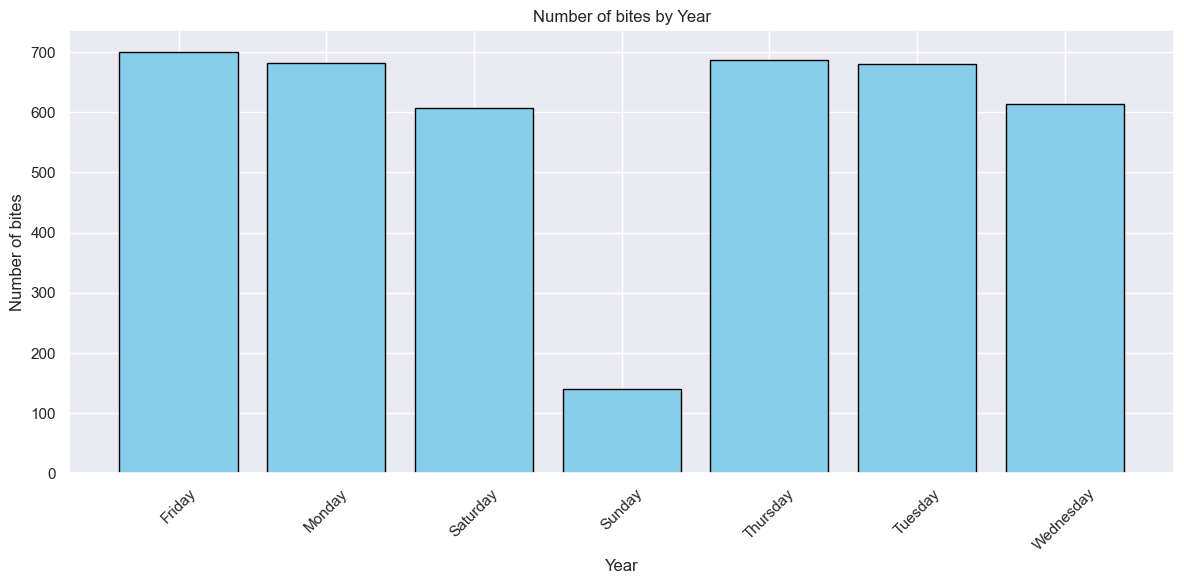

In [86]:
Bites_df['vaccination_day'] = Bites_df['vaccination_date'].dt.day_name()
# Group by year and count occurrences
vaccination_day_counts = Bites_df.groupby('vaccination_day').size()

# Plot bar graph for number of entries by year
plt.figure(figsize=(12, 6))
plt.bar(vaccination_day_counts.index.astype(str), vaccination_day_counts.values, color='skyblue', edgecolor='black')

# Customize tick labels
plt.title('Number of bites by Year')
plt.xlabel('Year')
plt.ylabel('Number of bites')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.tight_layout()
plt.show()

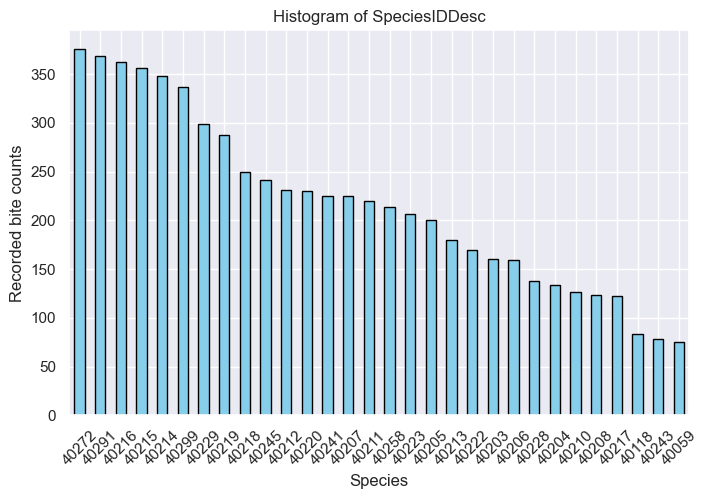

In [92]:
plt.figure(figsize=(8, 5))
Bites_df['victim_zip'].value_counts()[:30].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of SpeciesIDDesc')
plt.xlabel('Species')
plt.ylabel('Recorded bite counts')
plt.xticks(rotation=45)
plt.show()

In [94]:
Bites_df['victim_zip'].value_counts()

victim_zip
40272    376
40291    368
40216    362
40215    356
40214    348
        ... 
98105      1
42104      1
42743      1
40504      1
40515      1
Name: count, Length: 233, dtype: int64

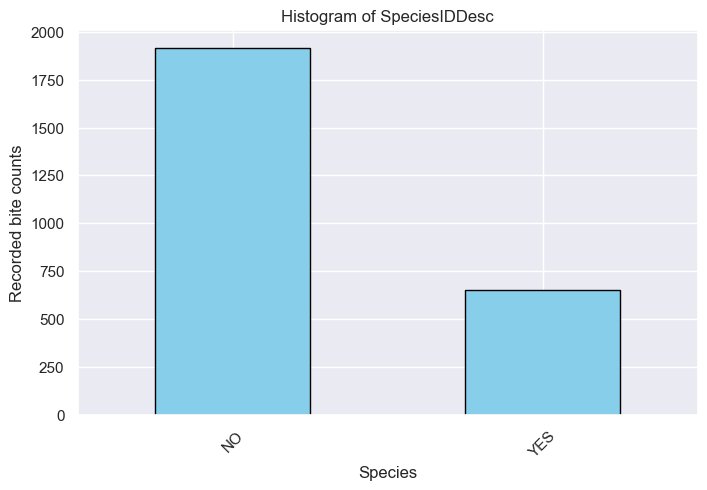

In [96]:
plt.figure(figsize=(8, 5))
Bites_df['AdvIssuedYNDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of SpeciesIDDesc')
plt.xlabel('Species')
plt.ylabel('Recorded bite counts')
plt.xticks(rotation=45)
plt.show()

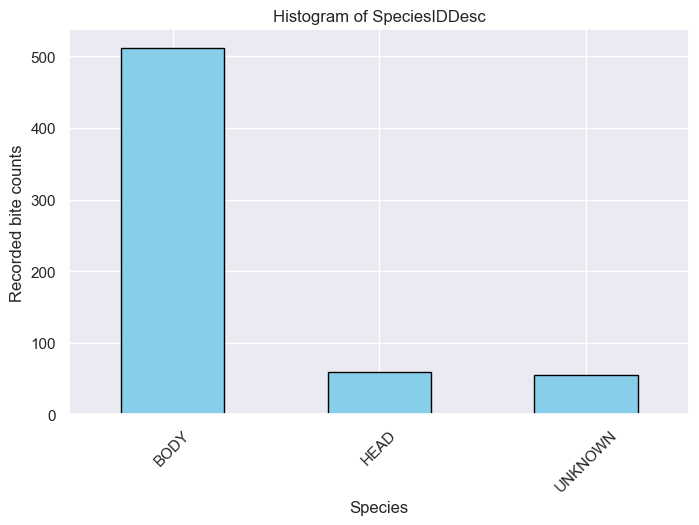

In [100]:
plt.figure(figsize=(8, 5))
Bites_df[Bites_df['AdvIssuedYNDesc']=="YES"]['WhereBittenIDDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of SpeciesIDDesc')
plt.xlabel('Species')
plt.ylabel('Recorded bite counts')
plt.xticks(rotation=45)
plt.show()

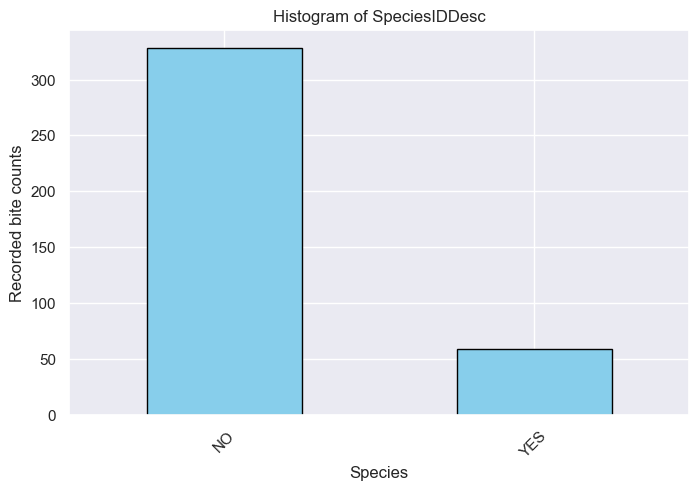

In [102]:
plt.figure(figsize=(8, 5))
Bites_df[Bites_df['WhereBittenIDDesc']=="HEAD"]['AdvIssuedYNDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of SpeciesIDDesc')
plt.xlabel('Species')
plt.ylabel('Recorded bite counts')
plt.xticks(rotation=45)
plt.show()

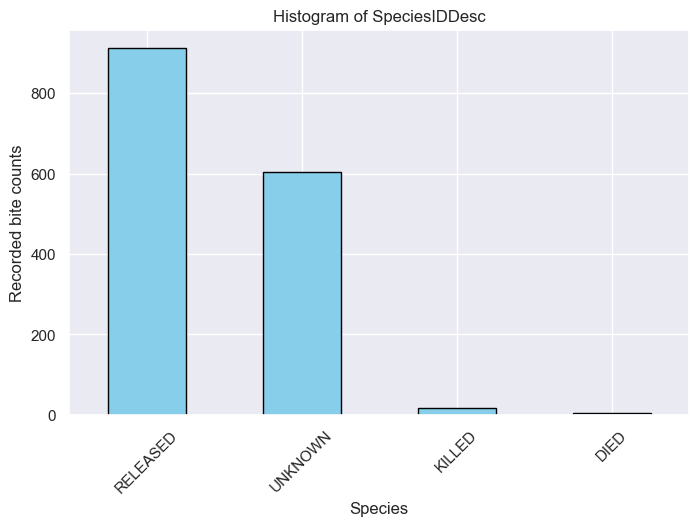

In [104]:
plt.figure(figsize=(8, 5))
Bites_df['DispositionIDDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of SpeciesIDDesc')
plt.xlabel('Species')
plt.ylabel('Recorded bite counts')
plt.xticks(rotation=45)
plt.show()

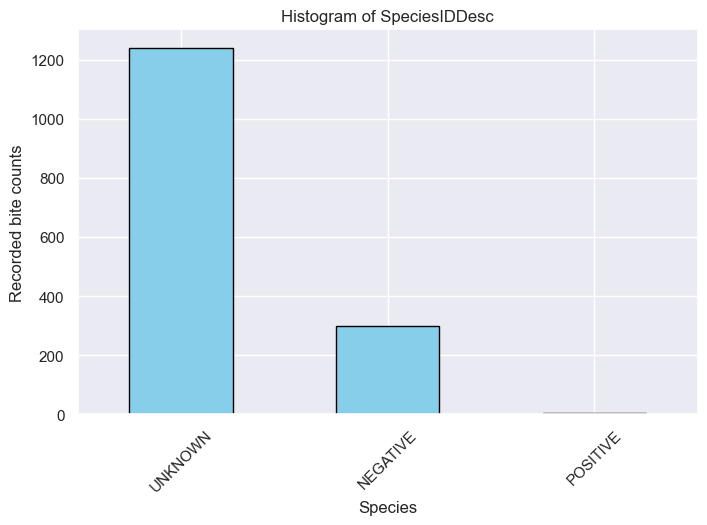

In [106]:
plt.figure(figsize=(8, 5))
Bites_df['ResultsIDDesc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of SpeciesIDDesc')
plt.xlabel('Species')
plt.ylabel('Recorded bite counts')
plt.xticks(rotation=45)
plt.show()

In [70]:
Bites_df.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc', 'year', 'month',
       'day_of_week'],
      dtype='object')